# Sentiment Analysis

## Purpose of the Project
* There are many applications of text classification. For example:
 * categorizing an email as spam or not,
 * extracting the emotion of a text.


* We will be doing sentiment analysis with Hugging Face.
* The goal of the project is to train a model to extract the emotion of a given text. (happy, sad, angry..). For this, we are going to use BERT based model: **DistilBERT**
* DistilBERT has as high performance as BERT but is smaller than BERT.

## Road Map of the Project
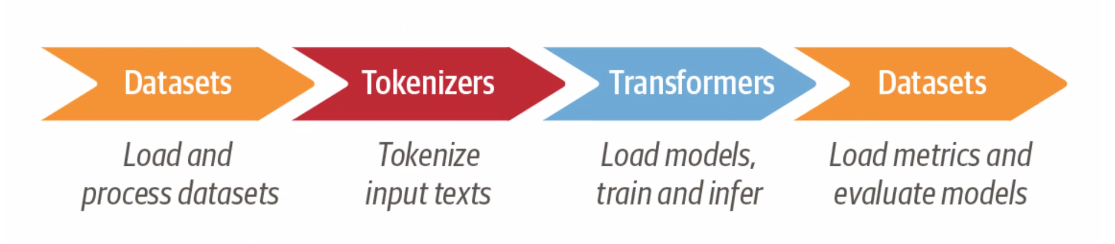

# 1- DATASET
## Importing Dataset
* This dataset consists of english tweets. 
* Dataset has 6 category. Anger, disgust, fear, joy, sadness, surprise.

In [1]:
!pip install -q datasets

In [2]:
from datasets import load_dataset

* You can access the dataset from the link below:

https://huggingface.co/datasets/dair-ai/emotion

In [3]:
emotions = load_dataset("dair-ai/emotion")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/dair-ai___emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

## Understanding Dataset

In [4]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [5]:
#exploring train set
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [6]:
len(train_ds)

16000

* train set has 16000 sample.

In [7]:
# getting the data in the index 1
train_ds[1]

{'text': 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'label': 0}

* "text" column holds the tweet text and "label" column holds the label of the tweet's emotion.

In [8]:
train_ds.column_names

['text', 'label']

In [9]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [10]:
# getting the first 5 data
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

## From Dataset to Pandas
* Converting dataset's format to Pandas format with *set_format* method

In [11]:
import pandas as pd

In [12]:
emotions.set_format(type = "pandas")

In [13]:
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


* Labels are integer, we can add their emotion labels to the table.

In [14]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

In [15]:
df["label_name"] = df["label"].apply(label_int2str)

In [16]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


## Data Visualization
* Let's draw a graph with matplotlib to see the distribution of the classes:

In [17]:
import matplotlib.pyplot as plt

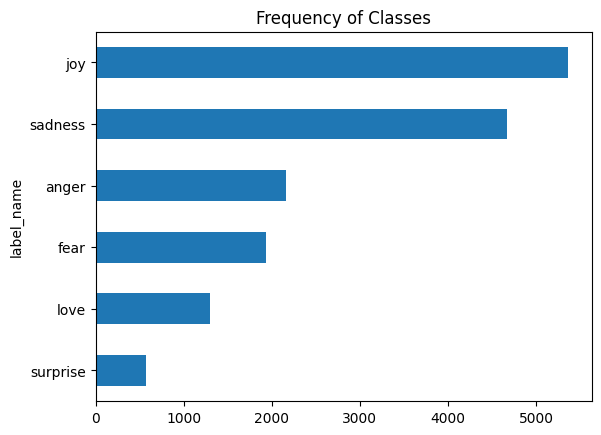

In [18]:
df["label_name"].value_counts(ascending = True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

* Visualization of post lengths by category with boxplot:

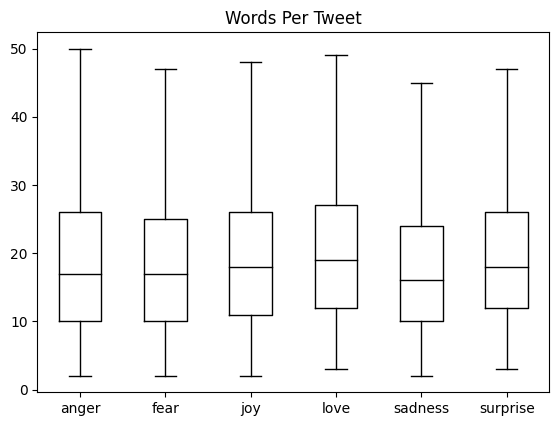

In [19]:
# calculating word count for each tweet
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by = "label_name", grid = False, showfliers = False, color = "black")
plt.suptitle("")
plt.xlabel("")
plt.show()

* We need to reset the dataset's format before data preprocessing:

In [20]:
emotions.reset_format()

# 2- DATA PREPROCESSING